# [Prediction-of-Road-Traffic-in-Jeju-Island]
- Competition : [제주도 도로 교통량 예측 AI 경진대회](https://dacon.io/competitions/official/235985/overview/description)
- Members : 곽은진, 고유경, 김가은, 김윤혜, 임채현

## train 데이터셋
- 2022년 8월 이전 데이터만 존재 (단, 날짜가 모두 연속적이지 않음)
- target : 평균 속도 -> 교통량이 많으면 평균 속도 떨어짐

## 변수설명
- id : 아이디
- base_date : 날짜
- day_of_week : 요일
- base_hour : 시간대
- road_in_use : 도로사용여부
- lane_count : 차로수
- road_rating : 도로등급
- multi_linked : 중용구간 여부
- connect_code : 연결로 코드
- maximum_speed_limit : 최고속도제한
- weight_restricted : 통과제한하중
- height_restricted	: 통과제한높이
- road_type : 도로유형
- start_latitude : 시작지점의 위도
- start_longitude : 시작지점의 경도
- start_turn_restricted	: 시작 지점의 회전제한 유무
- end_latitude : 도착지점의 위도
- end_longitude	: 도착지점의 경도
- end_turn_restricted : 도작지점의 회전제한 유무
- road_name : 도로명
- start_node_name : 시작지점명
- end_node_name	: 도착지점명
- vehicle_restricted : 통과제한차량
- target : 평균속도(km)

In [80]:
import warnings
warnings.filterwarnings(action='ignore')

import matplotlib.font_manager as fm 
plt.rcParams['font.family'] = 'Hancom Gothic'

### 데이터 불러오기

In [1]:
import pandas as pd

train = pd.read_csv("C:\\Class\\jeju-traffic\\train.csv")
test = pd.read_csv("C:\\Class\\jeju-traffic\\test.csv")

In [2]:
train

,id,base_date,day_of_week,base_hour,lane_count,road_rating,road_name,multi_linked,connect_code,maximum_speed_limit,...,road_type,start_node_name,start_latitude,start_longitude,start_turn_restricted,end_node_name,end_latitude,end_longitude,end_turn_restricted,target
0,TRAIN_0000000,20220623,목,17,1,106,지방도1112호선,0,0,60.0,...,3,제3교래교,33.427747,126.662612,없음,제3교래교,33.427749,126.662335,없음,52.0
1,TRAIN_0000001,20220728,목,21,2,103,일반국도11호선,0,0,60.0,...,0,광양사거리,33.500730,126.529107,있음,KAL사거리,33.504811,126.526240,없음,30.0
2,TRAIN_0000002,20211010,일,7,2,103,일반국도16호선,0,0,80.0,...,0,창고천교,33.279145,126.368598,없음,상창육교,33.280072,126.362147,없음,61.0
3,TRAIN_0000003,20220311,금,13,2,107,태평로,0,0,50.0,...,0,남양리조트,33.246081,126.567204,없음,서현주택,33.245565,126.566228,없음,20.0
4,TRAIN_0000004,20211005,화,8,2,103,일반국도12호선,0,0,80.0,...,0,애월샷시,33.462214,126.326551,없음,애월입구,33.462677,126.330152,없음,38.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4701212,TRAIN_4701212,20211104,목,16,1,107,-,0,0,50.0,...,0,대림사거리,33.422145,126.278125,없음,금덕해운,33.420955,126.273750,없음,20.0
4701213,TRAIN_4701213,20220331,목,2,2,107,-,0,0,80.0,...,3,광삼교,33.472505,126.424368,없음,광삼교,33.472525,126.424890,없음,65.0
4701214,TRAIN_4701214,20220613,월,22,2,103,일반국도12호선,0,0,60.0,...,0,고성교차로,33.447183,126.912579,없음,성산교차로,33.444121,126.912948,없음,30.0
4701215,TRAIN_4701215,20211020,수,2,2,103,일반국도95호선,0,0,80.0,...,0,제6광령교,33.443596,126.431817,없음,관광대학입구,33.444996,126.433332,없음,73.0


In [40]:
test

,id,base_date,day_of_week,base_hour,lane_count,road_rating,road_name,multi_linked,connect_code,maximum_speed_limit,...,height_restricted,road_type,start_node_name,start_latitude,start_longitude,start_turn_restricted,end_node_name,end_latitude,end_longitude,end_turn_restricted
0,TEST_000000,20220825,목,17,3,107,연삼로,0,0,70.0,...,0.0,0,산지2교,33.499427,126.541298,없음,제주은행사거리,33.500772,126.543837,있음
1,TEST_000001,20220809,화,12,2,103,일반국도12호선,0,0,70.0,...,0.0,3,중문입구,33.258507,126.427003,없음,관광단지입구,33.258119,126.415840,없음
2,TEST_000002,20220805,금,2,1,103,일반국도16호선,0,0,60.0,...,0.0,0,도순3교,33.258960,126.476508,없음,도순2교,33.259206,126.474687,없음
3,TEST_000003,20220818,목,23,3,103,일반국도11호선,0,0,70.0,...,0.0,0,아라주공아파트,33.473494,126.545647,없음,인다마을,33.471061,126.545467,없음
4,TEST_000004,20220810,수,17,3,106,번영로,0,0,70.0,...,0.0,0,부록교 시종점,33.501477,126.569223,없음,봉개교 시종점,33.496863,126.581230,없음
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
291236,TEST_291236,20220827,토,5,1,103,일반국도16호선,0,0,80.0,...,0.0,0,월산마을,33.472819,126.463030,없음,도근교,33.470483,126.460846,없음
291237,TEST_291237,20220819,금,20,2,103,일반국도11호선,0,0,60.0,...,0.0,0,영주교,33.305359,126.598914,없음,하례입구삼거리,33.300796,126.600332,없음
291238,TEST_291238,20220805,금,11,1,107,신대로,0,0,30.0,...,0.0,0,마리나사거리,33.493624,126.496769,있음,칠오광장사거리,33.497500,126.496946,있음
291239,TEST_291239,20220812,금,7,2,107,경찰로,0,0,60.0,...,0.0,0,국민의료보험관리공단,33.254782,126.507014,없음,의료보험조합,33.255659,126.507333,없음


### 데이터 확인

In [41]:
train.isnull().sum()  #결측값 없음

id                       0
base_date                0
day_of_week              0
base_hour                0
lane_count               0
road_rating              0
road_name                0
multi_linked             0
connect_code             0
maximum_speed_limit      0
vehicle_restricted       0
weight_restricted        0
height_restricted        0
road_type                0
start_node_name          0
start_latitude           0
start_longitude          0
start_turn_restricted    0
end_node_name            0
end_latitude             0
end_longitude            0
end_turn_restricted      0
target                   0
dtype: int64

In [42]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4701217 entries, 0 to 4701216
Data columns (total 23 columns):
 #   Column                 Dtype  
---  ------                 -----  
 0   id                     object 
 1   base_date              int64  
 2   day_of_week            object 
 3   base_hour              int64  
 4   lane_count             int64  
 5   road_rating            int64  
 6   road_name              object 
 7   multi_linked           int64  
 8   connect_code           int64  
 9   maximum_speed_limit    float64
 10  vehicle_restricted     float64
 11  weight_restricted      float64
 12  height_restricted      float64
 13  road_type              int64  
 14  start_node_name        object 
 15  start_latitude         float64
 16  start_longitude        float64
 17  start_turn_restricted  object 
 18  end_node_name          object 
 19  end_latitude           float64
 20  end_longitude          float64
 21  end_turn_restricted    object 
 22  target            

day of week 요일 변수는 범주형으로 만들어도 될 듯

In [43]:
columns = list(train.columns)

print(columns)

['id', 'base_date', 'day_of_week', 'base_hour', 'lane_count', 'road_rating', 'road_name', 'multi_linked', 'connect_code', 'maximum_speed_limit', 'vehicle_restricted', 'weight_restricted', 'height_restricted', 'road_type', 'start_node_name', 'start_latitude', 'start_longitude', 'start_turn_restricted', 'end_node_name', 'end_latitude', 'end_longitude', 'end_turn_restricted', 'target']


In [84]:
for i in columns:
    print(i,"\n",train[i].nunique(),"\n")

id 
 4701217 

base_date 
 281 

day_of_week 
 7 

base_hour 
 24 

lane_count 
 3 

road_rating 
 3 

road_name 
 61 

multi_linked 
 2 

connect_code 
 2 

maximum_speed_limit 
 6 

vehicle_restricted 
 1 

weight_restricted 
 4 

height_restricted 
 1 

road_type 
 2 

start_node_name 
 487 

start_latitude 
 586 

start_longitude 
 586 

start_turn_restricted 
 2 

end_node_name 
 487 

end_latitude 
 586 

end_longitude 
 586 

end_turn_restricted 
 2 

target 
 102 



종류가 10개 이하인 변수들 :  

'day_of_week','lane_count','road_rating','multi_linked','connect_code','maximum_speed_limit','vehicle_restricted',
'weight_restricted','height_restricted','road_type','start_turn_restricted','end_turn_restricted'

In [56]:
lst = ['day_of_week','lane_count','road_rating','multi_linked','connect_code','maximum_speed_limit','vehicle_restricted',
       'weight_restricted','height_restricted','road_type','start_turn_restricted','end_turn_restricted']

for i in lst:
    print(train[i].value_counts(),"\n")

day_of_week 
 day_of_week
금    684024
수    675583
목    674070
일    673632
토    669767
화    662498
월    661643
Name: count, dtype: int64 

lane_count 
 lane_count
2    2352092
1    1558531
3     790594
Name: count, dtype: int64 

road_rating 
 road_rating
103    2159511
107    1582214
106     959492
Name: count, dtype: int64 

multi_linked 
 multi_linked
0    4698978
1       2239
Name: count, dtype: int64 

connect_code 
 connect_code
0      4689075
103      12142
Name: count, dtype: int64 

maximum_speed_limit 
 maximum_speed_limit
60.0    1665573
50.0    1103682
70.0     995077
80.0     700334
30.0     229761
40.0       6790
Name: count, dtype: int64 

vehicle_restricted 
 vehicle_restricted
0.0    4701217
Name: count, dtype: int64 

weight_restricted 
 weight_restricted
0.0        4032874
43200.0     410361
32400.0     239305
50000.0      18677
Name: count, dtype: int64 

height_restricted 
 height_restricted
0.0    4701217
Name: count, dtype: int64 

road_type 
 road_type
0    37371

### 메모리 사용 용량 줄이기

In [57]:
# lst 내의 변수들 카테고리화
for i in lst:
    train[i] = train[i].astype('category')

# 정수형 변수 int64 -> int32
train['base_date']=train['base_date'].astype('int32')
train['base_hour']=train['base_hour'].astype('int32')

In [58]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4701217 entries, 0 to 4701216
Data columns (total 23 columns):
 #   Column                 Dtype   
---  ------                 -----   
 0   id                     object  
 1   base_date              int32   
 2   day_of_week            category
 3   base_hour              int32   
 4   lane_count             category
 5   road_rating            category
 6   road_name              object  
 7   multi_linked           category
 8   connect_code           category
 9   maximum_speed_limit    category
 10  vehicle_restricted     category
 11  weight_restricted      category
 12  height_restricted      category
 13  road_type              category
 14  start_node_name        object  
 15  start_latitude         float64 
 16  start_longitude        float64 
 17  start_turn_restricted  category
 18  end_node_name          object  
 19  end_latitude           float64 
 20  end_longitude          float64 
 21  end_turn_restricted    category

memory usage 825에서 412로

### 이상치 확인

In [48]:
import matplotlib.pyplot as plt
import seaborn as sns

In [59]:
# 수치형 변수명만 추출
train_numeric = train.select_dtypes(include = ["float64","int32"])

train_numeric

,base_date,base_hour,start_latitude,start_longitude,end_latitude,end_longitude,target
0,20220623,17,33.427747,126.662612,33.427749,126.662335,52.0
1,20220728,21,33.500730,126.529107,33.504811,126.526240,30.0
2,20211010,7,33.279145,126.368598,33.280072,126.362147,61.0
3,20220311,13,33.246081,126.567204,33.245565,126.566228,20.0
4,20211005,8,33.462214,126.326551,33.462677,126.330152,38.0
...,...,...,...,...,...,...,...
4701212,20211104,16,33.422145,126.278125,33.420955,126.273750,20.0
4701213,20220331,2,33.472505,126.424368,33.472525,126.424890,65.0
4701214,20220613,22,33.447183,126.912579,33.444121,126.912948,30.0
4701215,20211020,2,33.443596,126.431817,33.444996,126.433332,73.0


In [60]:
numeric_feature = list(train_numeric.columns)

print(numeric_feature)

['base_date', 'base_hour', 'start_latitude', 'start_longitude', 'end_latitude', 'end_longitude', 'target']


#### Boxplot 그려보기

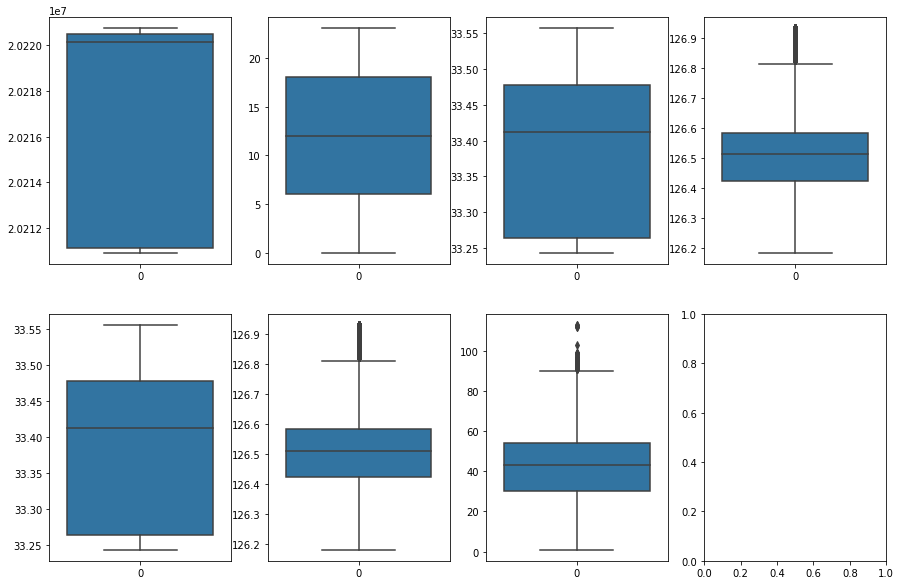

In [61]:
fig, axes = plt.subplots(nrows=2, ncols=4, figsize=(15, 10))

for row in range(2):
    for col in range(4):
        idx = row * 4 + col
        ax = axes[row][col]
        if idx < len(numeric_feature):
            value = numeric_feature[idx]
            sns.boxplot(train[value],ax=ax)

plt.show()

'start_longitude', 'end_longitude', 'target' 이상치 존재?

### 데이터 분포 확인

- 독립변수 - 범주형 변수

In [63]:
train_category = train.select_dtypes(include = ["category"])

categorical_feature = list(train_category)
categorical_feature

['day_of_week',
 'lane_count',
 'road_rating',
 'multi_linked',
 'connect_code',
 'maximum_speed_limit',
 'vehicle_restricted',
 'weight_restricted',
 'height_restricted',
 'road_type',
 'start_turn_restricted',
 'end_turn_restricted']

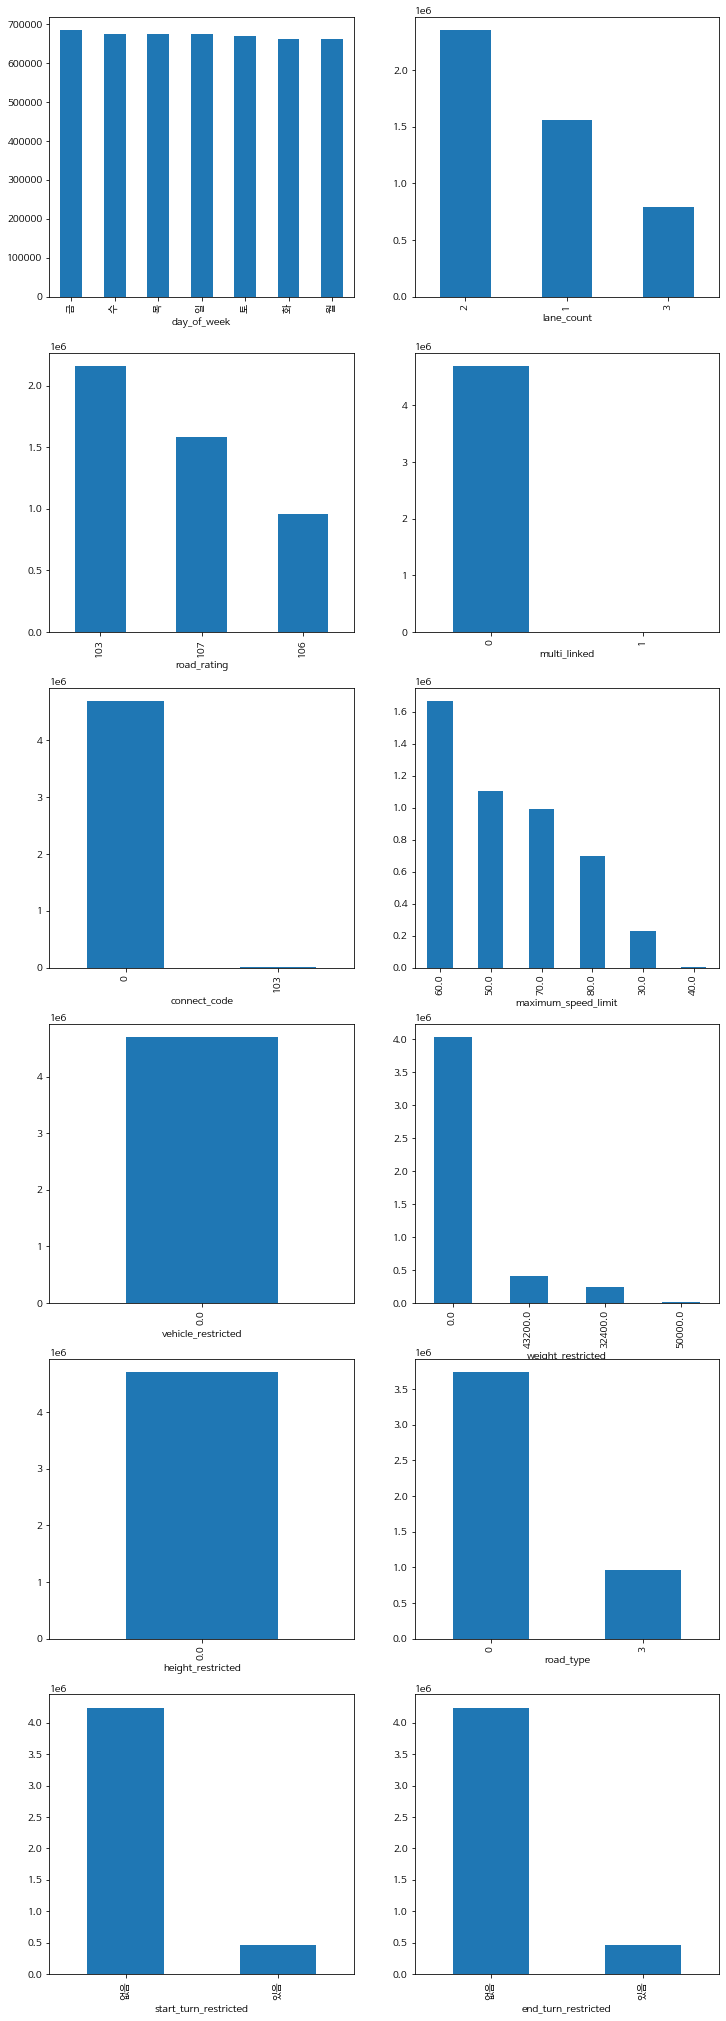

In [82]:
fig, axes = plt.subplots(nrows=6, ncols=2, figsize=(12, 36))

for row in range(6):
    for col in range(2):
        idx = row * 2 + col

        if idx < len(categorical_feature):
            ax = axes[row][col]
            value = categorical_feature[idx]
            train[value].value_counts().plot(kind='bar',ax=ax)

plt.show()

- 독립변수 - 수치형 변수

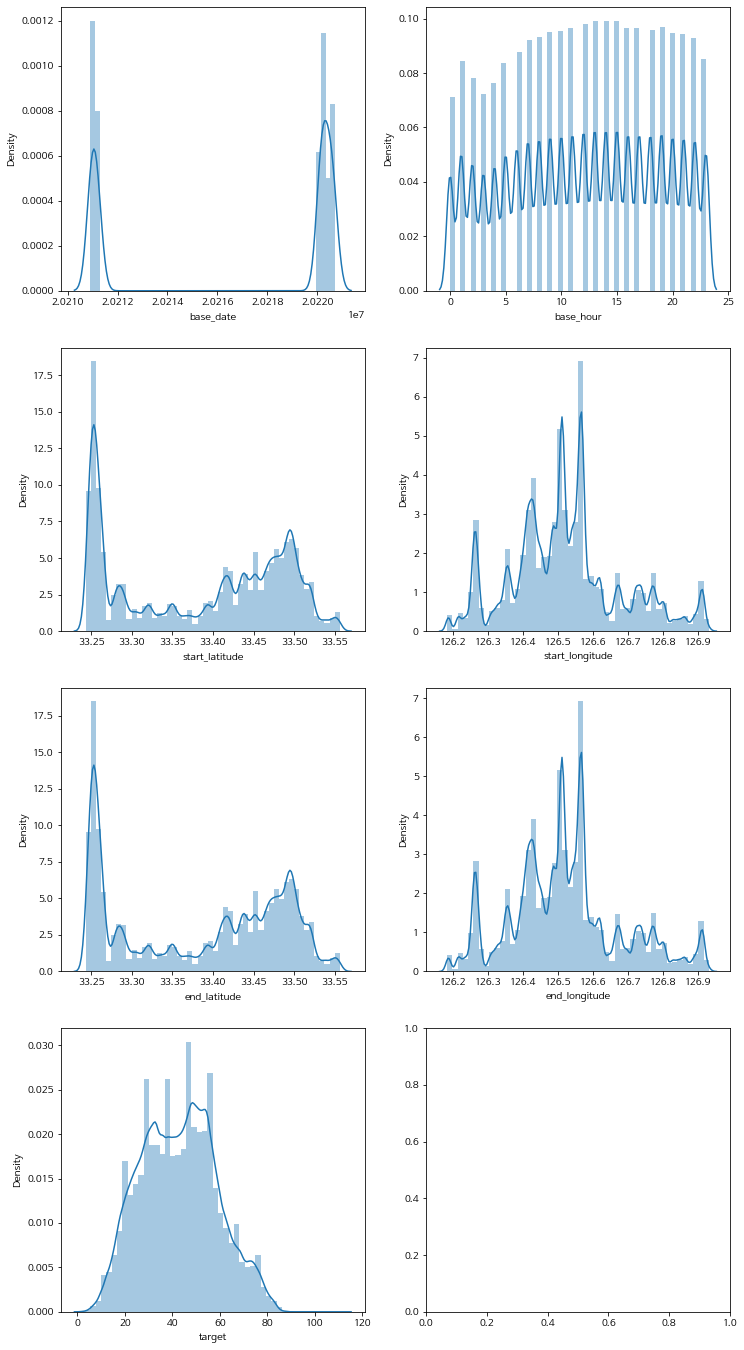

In [100]:
fig, axes = plt.subplots(nrows=4, ncols=2, figsize=(12, 24))

for row in range(4):
    for col in range(2):
        idx = row * 2 + col
        ax = axes[row][col]
        if idx < len(numeric_feature):
            value = numeric_feature[idx]
            sns.distplot(train[value],ax=ax)

plt.show()

   왜도값이 크게 관찰되는 변수는 없는 듯

- 반응변수('target')

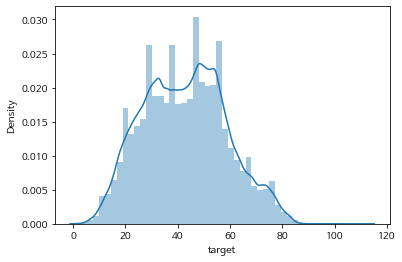

In [101]:
sns.distplot(train['target'])
plt.show()

### 변수 간 상관관계 확인

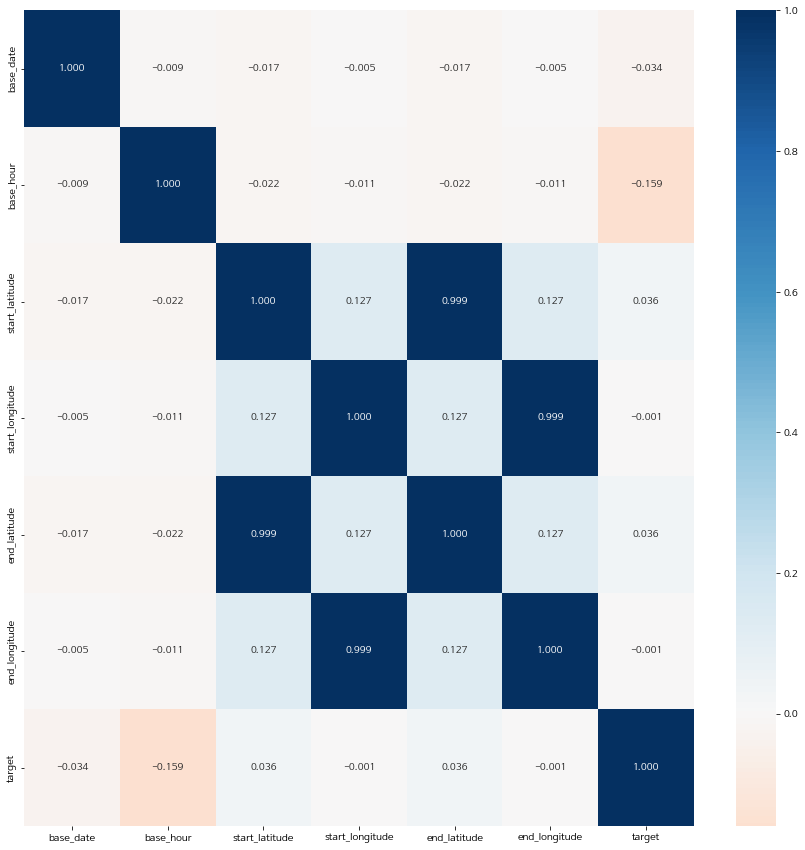

In [92]:
corr_var = numeric_feature

corr = train[corr_var].corr()

fig, ax = plt.subplots()
fig.set_size_inches(15,15)
sns.heatmap(corr, annot=True, fmt=".3f", cmap="RdBu", center=0, ax=ax)

plt.show()

start_latitude <-> end_latitude // start_longitude <-> end_longitude 사이에 강한 상관관계 존재

#### 시작지점, 도착지점 산점도

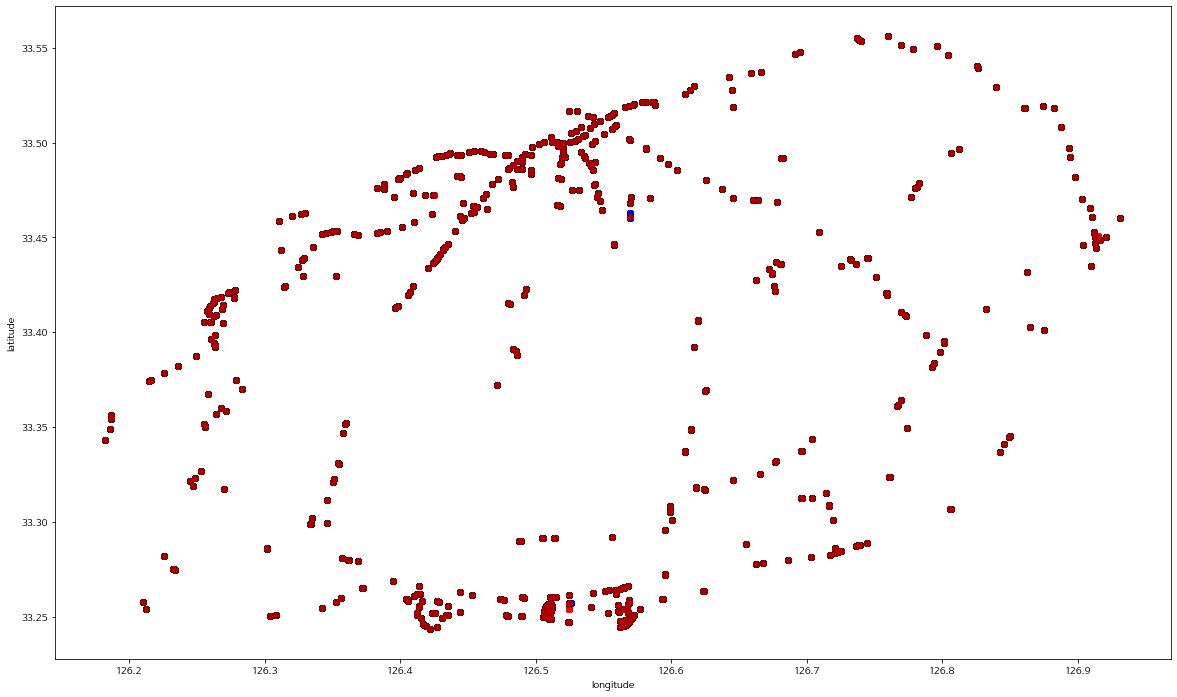

In [99]:
fig, ax = plt.subplots()
fig.set_size_inches(20,12)

ax.scatter(train.start_longitude, train.start_latitude, color="blue",alpha=0.01)
ax.scatter(train.end_longitude, train.end_latitude, color="red",alpha=0.01)


plt.xlabel("longitude")
plt.ylabel("latitude")
plt.show()

시작지점, 도착지점 거의 일치함

- 날짜별 데이터 분포 확인

In [5]:
train['base_date']= train['base_date'].astype('str')
train['base_date']

0          20220623
1          20220728
2          20211010
3          20220311
4          20211005
             ...   
4701212    20211104
4701213    20220331
4701214    20220613
4701215    20211020
4701216    20211019
Name: base_date, Length: 4701217, dtype: object

In [8]:
train['base_date'] = pd.to_datetime(train['base_date'])
train['base_date']

0         2022-06-23
1         2022-07-28
2         2021-10-10
3         2022-03-11
4         2021-10-05
             ...    
4701212   2021-11-04
4701213   2022-03-31
4701214   2022-06-13
4701215   2021-10-20
4701216   2021-10-19
Name: base_date, Length: 4701217, dtype: datetime64[ns]